# Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns;
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', 21)

# Raw Dataset

In [2]:
raw_df = pd.read_csv("../../datasets/apping/WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Table

In [3]:
raw_df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

# Data Cleaning

## Rename column

In [4]:
raw_rename_columns_df = raw_df.rename(columns={'customerID' : 'customer_id',
                                               'SeniorCitizen' : 'senior_citizen',
                                               'Partner' : 'partner',
                                               'Dependents' : 'dependents',
                                               'PhoneService' : 'phone_service',
                                               'MultipleLines' : 'multiple_lines',
                                               'InternetService' : 'internet_service',
                                               'OnlineSecurity' : 'online_security',
                                               'OnlineBackup' : 'online_backup',
                                               'DeviceProtection' : 'device_protection',
                                               'TechSupport' : 'tech_support',
                                               'StreamingTV' : 'streaming_tv',
                                               'StreamingMovies' : 'streaming_movies',
                                               'Contract' : 'contract',
                                               'PaperlessBilling' : 'paperless_billing',
                                               'PaymentMethod' : 'payment_method',
                                               'MonthlyCharges' : 'monthly_charges',
                                               'TotalCharges' : 'total_charges',
                                               'Churn' : 'churn'})

In [5]:
raw_rename_columns_df.head(5)

customer_id  gender  senior_citizen partner dependents  tenure  \
0  7590-VHVEG  Female               0     Yes         No       1   
1  5575-GNVDE    Male               0      No         No      34   
2  3668-QPYBK    Male               0      No         No       2   
3  7795-CFOCW    Male               0      No         No      45   
4  9237-HQITU  Female               0      No         No       2   

  phone_service    multiple_lines internet_service online_security  \
0            No  No phone service              DSL              No   
1           Yes                No              DSL             Yes   
2           Yes                No              DSL             Yes   
3            No  No phone service              DSL             Yes   
4           Yes                No      Fiber optic              No   

  online_backup device_protection tech_support streaming_tv streaming_movies  \
0           Yes                No           No           No               No   
1            No               Yes           No           No               No   
2           Yes                No           No           No               No   
3            No               Yes          Yes           No               No   
4            No                No           No           No               No   

         contract paperless_billing             payment_method  \
0  Month-to-month               Yes           Electronic check   
1        One year                No               Mailed check   
2  Month-to-month               Yes               Mailed check   
3        One year                No  Bank transfer (automatic)   
4  Month-to-month               Yes           Electronic check   

   monthly_charges total_charges churn  
0            29.85         29.85    No  
1            56.95        1889.5    No  
2            53.85        108.15   Yes  
3            42.30       1840.75    No  
4            70.70        151.65   Yes

## Replace value

In [6]:
raw_replace_value_df = raw_rename_columns_df.replace({'No phone service' : 'No', 'No internet service' : 'No'})

In [7]:
raw_replace_value_df

customer_id  gender  senior_citizen partner dependents  tenure  \
0     7590-VHVEG  Female               0     Yes         No       1   
1     5575-GNVDE    Male               0      No         No      34   
2     3668-QPYBK    Male               0      No         No       2   
3     7795-CFOCW    Male               0      No         No      45   
4     9237-HQITU  Female               0      No         No       2   
...          ...     ...             ...     ...        ...     ...   
7038  6840-RESVB    Male               0     Yes        Yes      24   
7039  2234-XADUH  Female               0     Yes        Yes      72   
7040  4801-JZAZL  Female               0     Yes        Yes      11   
7041  8361-LTMKD    Male               1     Yes         No       4   
7042  3186-AJIEK    Male               0      No         No      66   

     phone_service multiple_lines internet_service online_security  \
0               No             No              DSL              No   
1              Yes             No              DSL             Yes   
2              Yes             No              DSL             Yes   
3               No             No              DSL             Yes   
4              Yes             No      Fiber optic              No   
...            ...            ...              ...             ...   
7038           Yes            Yes              DSL             Yes   
7039           Yes            Yes      Fiber optic              No   
7040            No             No              DSL             Yes   
7041           Yes            Yes      Fiber optic              No   
7042           Yes             No      Fiber optic             Yes   

     online_backup device_protection tech_support streaming_tv  \
0              Yes                No           No           No   
1               No               Yes           No           No   
2              Yes                No           No           No   
3               No               Yes          Yes           No   
4               No                No           No           No   
...            ...               ...          ...          ...   
7038            No               Yes          Yes          Yes   
7039           Yes               Yes           No          Yes   
7040            No                No           No           No   
7041            No                No           No           No   
7042            No               Yes          Yes          Yes   

     streaming_movies        contract paperless_billing  \
0                  No  Month-to-month               Yes   
1                  No        One year                No   
2                  No  Month-to-month               Yes   
3                  No        One year                No   
4                  No  Month-to-month               Yes   
...               ...             ...               ...   
7038              Yes        One year               Yes   
7039              Yes        One year               Yes   
7040               No  Month-to-month               Yes   
7041               No  Month-to-month               Yes   
7042              Yes        Two year               Yes   

                 payment_method  monthly_charges total_charges churn  
0              Electronic check            29.85         29.85    No  
1                  Mailed check            56.95        1889.5    No  
2                  Mailed check            53.85        108.15   Yes  
3     Bank transfer (automatic)            42.30       1840.75    No  
4              Electronic check            70.70        151.65   Yes  
...                         ...              ...           ...   ...  
7038               Mailed check            84.80        1990.5    No  
7039    Credit card (automatic)           103.20        7362.9    No  
7040           Electronic check            29.60        346.45    No  
7041               Mailed check            74.40         306.6   Yes  
7042  Bank transfer (automat

## Missing Value

In [8]:
raw_replace_value_df.isna().sum().to_frame().rename(columns={0 : 'Number of Missing Value (%)'})

Number of Missing Value (%)
customer_id                                  0
gender                                       0
senior_citizen                               0
partner                                      0
dependents                                   0
tenure                                       0
phone_service                                0
multiple_lines                               0
internet_service                             0
online_security                              0
online_backup                                0
device_protection                            0
tech_support                                 0
streaming_tv                                 0
streaming_movies                             0
contract                                     0
paperless_billing                            0
payment_method                               0
monthly_charges                              0
total_charges                                0
churn                                        0

## Duplicate Value

In [9]:
print(f'Number of duplicate value : {raw_replace_value_df.duplicated().sum()}')

Number of duplicate value : 0


## Mismatch Value

Pada fitur total_charges datatype nya adalah object, yang seharusnya float.

In [10]:
raw_replace_value_df.dtypes.to_frame().rename(columns={0 : 'Datatype'})

Datatype
customer_id         object
gender              object
senior_citizen       int64
partner             object
dependents          object
tenure               int64
phone_service       object
multiple_lines      object
internet_service    object
online_security     object
online_backup       object
device_protection   object
tech_support        object
streaming_tv        object
streaming_movies    object
contract            object
paperless_billing   object
payment_method      object
monthly_charges    float64
total_charges       object
churn               object

In [11]:
raw_replace_value_df['total_charges'] = pd.to_numeric(raw_replace_value_df['total_charges'], errors='coerce')
raw_mismatch_value_df = raw_replace_value_df

In [12]:
raw_mismatch_value_df.dtypes.to_frame().rename(columns={0 : 'Datatype'})

Datatype
customer_id         object
gender              object
senior_citizen       int64
partner             object
dependents          object
tenure               int64
phone_service       object
multiple_lines      object
internet_service    object
online_security     object
online_backup       object
device_protection   object
tech_support        object
streaming_tv        object
streaming_movies    object
contract            object
paperless_billing   object
payment_method      object
monthly_charges    float64
total_charges      float64
churn               object

# Feature Engineering

In [13]:
raw_feature_tranformation_df = raw_mismatch_value_df

In [14]:
raw_feature_tranformation_df.head(1)

customer_id  gender  senior_citizen partner dependents  tenure  \
0  7590-VHVEG  Female               0     Yes         No       1   

  phone_service multiple_lines internet_service online_security online_backup  \
0            No             No              DSL              No           Yes   

  device_protection tech_support streaming_tv streaming_movies  \
0                No           No           No               No   

         contract paperless_billing    payment_method  monthly_charges  \
0  Month-to-month               Yes  Electronic check            29.85   

   total_charges churn  
0          29.85    No

## Feature Transformation

### Binary Lable

#### gender

In [15]:
gender_lb = preprocessing.LabelBinarizer()
gender_lb.fit(raw_feature_tranformation_df['gender'])
gender_lb.classes_

array(['Female', 'Male'], dtype='<U6')

In [16]:
raw_feature_tranformation_df['gender'] = gender_lb.transform(raw_mismatch_value_df['gender'])

#### partner

In [17]:
partner_lb = preprocessing.LabelBinarizer()
partner_lb.fit(raw_feature_tranformation_df['partner'])
partner_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [18]:
raw_feature_tranformation_df['partner'] = gender_lb.transform(raw_mismatch_value_df['partner'])

#### dependents

In [19]:
dependents_lb = preprocessing.LabelBinarizer()
dependents_lb.fit(raw_feature_tranformation_df['dependents'])
dependents_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [20]:
raw_feature_tranformation_df['dependents'] = gender_lb.transform(raw_mismatch_value_df['dependents'])

#### phone_service

In [21]:
phone_service_lb = preprocessing.LabelBinarizer()
phone_service_lb.fit(raw_feature_tranformation_df['phone_service'])
phone_service_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [22]:
raw_feature_tranformation_df['phone_service'] = gender_lb.transform(raw_mismatch_value_df['phone_service'])

#### multiple_lines

In [23]:
multiple_lines_lb = preprocessing.LabelBinarizer()
multiple_lines_lb.fit(raw_feature_tranformation_df['multiple_lines'])
multiple_lines_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [24]:
raw_feature_tranformation_df['multiple_lines'] = multiple_lines_lb.transform(raw_mismatch_value_df['multiple_lines'])

#### internet_service

In [25]:
internet_sevice_le = preprocessing.LabelEncoder()
internet_sevice_le.fit(raw_feature_tranformation_df['internet_service'])
internet_sevice_le.classes_

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [26]:
raw_feature_tranformation_df['internet_service'] = internet_sevice_le.transform(raw_mismatch_value_df['internet_service'])

In [27]:
raw_feature_tranformation_df.head(1)

customer_id  gender  senior_citizen  partner  dependents  tenure  \
0  7590-VHVEG       0               0        0           0       1   

   phone_service  multiple_lines  internet_service online_security  \
0              0               0                 0              No   

  online_backup device_protection tech_support streaming_tv streaming_movies  \
0           Yes                No           No           No               No   

         contract paperless_billing    payment_method  monthly_charges  \
0  Month-to-month               Yes  Electronic check            29.85   

   total_charges churn  
0          29.85    No

#### online_security

In [28]:
online_security_lb = preprocessing.LabelEncoder()
online_security_lb.fit(raw_feature_tranformation_df['online_security'])
online_security_lb.classes_

array(['No', 'Yes'], dtype=object)

In [29]:
raw_feature_tranformation_df['online_security'] = online_security_lb.transform(raw_mismatch_value_df['online_security'])

#### online_backup

In [30]:
online_backup_lb = preprocessing.LabelEncoder()
online_backup_lb.fit(raw_feature_tranformation_df['online_backup'])
online_backup_lb.classes_

array(['No', 'Yes'], dtype=object)

In [31]:
raw_feature_tranformation_df['online_backup'] = online_backup_lb.transform(raw_mismatch_value_df['online_backup'])

#### device_protection

In [32]:
device_protection_lb = preprocessing.LabelBinarizer()
device_protection_lb.fit(raw_feature_tranformation_df['device_protection'])
device_protection_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [33]:
raw_feature_tranformation_df['device_protection'] = device_protection_lb.transform(raw_mismatch_value_df['device_protection'])

#### tech_support

In [34]:
tech_support_lb = preprocessing.LabelBinarizer()
tech_support_lb.fit(raw_feature_tranformation_df['tech_support'])
tech_support_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [35]:
raw_feature_tranformation_df['tech_support'] = device_protection_lb.transform(raw_mismatch_value_df['tech_support'])

#### streaming_movies

In [36]:
streaming_tv_lb = preprocessing.LabelBinarizer()
streaming_tv_lb.fit(raw_feature_tranformation_df['streaming_tv'])
streaming_tv_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [37]:
raw_feature_tranformation_df['streaming_tv'] = streaming_tv_lb.transform(raw_mismatch_value_df['streaming_tv'])

#### streaming_movies

In [38]:
streaming_movies_lb = preprocessing.LabelBinarizer()
streaming_movies_lb.fit(raw_feature_tranformation_df['streaming_movies'])
streaming_movies_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [39]:
raw_feature_tranformation_df['streaming_movies'] = streaming_tv_lb.transform(raw_mismatch_value_df['streaming_movies'])

#### paperless_billing

In [40]:
paperless_billing_lb = preprocessing.LabelBinarizer()
paperless_billing_lb.fit(raw_feature_tranformation_df['paperless_billing'])
paperless_billing_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [41]:
raw_feature_tranformation_df['paperless_billing'] = paperless_billing_lb.transform(raw_mismatch_value_df['paperless_billing'])

#### churn

In [42]:
churn_lb = preprocessing.LabelBinarizer()
churn_lb.fit(raw_feature_tranformation_df['churn'])
churn_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [43]:
raw_feature_tranformation_df['churn'] = churn_lb.transform(raw_mismatch_value_df['churn'])

### Multiple Lable

In [44]:
raw_feature_tranformation_df.head(1)

customer_id  gender  senior_citizen  partner  dependents  tenure  \
0  7590-VHVEG       0               0        0           0       1   

   phone_service  multiple_lines  internet_service  online_security  \
0              0               0                 0                0   

   online_backup  device_protection  tech_support  streaming_tv  \
0              1                  0             0             0   

   streaming_movies        contract  paperless_billing    payment_method  \
0                 0  Month-to-month                  1  Electronic check   

   monthly_charges  total_charges  churn  
0            29.85          29.85      0

#### contract

In [45]:
contract_le = preprocessing.LabelEncoder()
contract_le.fit(raw_feature_tranformation_df['contract'])
contract_le.classes_

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [46]:
raw_feature_tranformation_df['contract'] = contract_le.transform(raw_mismatch_value_df['contract'])

#### payment_method

In [47]:
payment_method_le = preprocessing.LabelEncoder()
payment_method_le.fit(raw_feature_tranformation_df['payment_method'])
payment_method_le.classes_

array(['Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)

In [48]:
raw_feature_tranformation_df['payment_method'] = payment_method_le.transform(raw_mismatch_value_df['payment_method'])

### New feature

#### total_charges
Nilai dari feature tidak sesuai tidak sesuai dengan hasil kalkulasi dari tenure * monthly_charges. Maka akan dibuat dibuat fitur baru dari hasil perkalian tenure dan monthly_charges

In [49]:
raw_feature_tranformation_df.drop(['total_charges'], axis=1).head()

customer_id  gender  senior_citizen  partner  dependents  tenure  \
0  7590-VHVEG       0               0        0           0       1   
1  5575-GNVDE       1               0        0           0      34   
2  3668-QPYBK       1               0        0           0       2   
3  7795-CFOCW       1               0        0           0      45   
4  9237-HQITU       0               0        0           0       2   

   phone_service  multiple_lines  internet_service  online_security  \
0              0               0                 0                0   
1              0               0                 0                1   
2              0               0                 0                1   
3              0               0                 0                1   
4              0               0                 1                0   

   online_backup  device_protection  tech_support  streaming_tv  \
0              1                  0             0             0   
1              0                  1             0             0   
2              1                  0             0             0   
3              0                  1             1             0   
4              0                  0             0             0   

   streaming_movies  contract  paperless_billing  payment_method  \
0                 0         0                  1               2   
1                 0         1                  0               3   
2                 0         0                  1               3   
3                 0         1                  0               0   
4                 0         0                  1               2   

   monthly_charges  churn  
0            29.85      0  
1            56.95      0  
2            53.85      1  
3            42.30      0  
4            70.70      1

In [50]:
raw_feature_tranformation_df['total_charges'] = raw_feature_tranformation_df['tenure'] * raw_feature_tranformation_df['monthly_charges']

In [51]:
raw_feature_tranformation_df[['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn',
       ]].head()

customer_id  gender  senior_citizen  partner  dependents  tenure  \
0  7590-VHVEG       0               0        0           0       1   
1  5575-GNVDE       1               0        0           0      34   
2  3668-QPYBK       1               0        0           0       2   
3  7795-CFOCW       1               0        0           0      45   
4  9237-HQITU       0               0        0           0       2   

   phone_service  multiple_lines  internet_service  online_security  \
0              0               0                 0                0   
1              0               0                 0                1   
2              0               0                 0                1   
3              0               0                 0                1   
4              0               0                 1                0   

   online_backup  device_protection  tech_support  streaming_tv  \
0              1                  0             0             0   
1              0                  1             0             0   
2              1                  0             0             0   
3              0                  1             1             0   
4              0                  0             0             0   

   streaming_movies  contract  paperless_billing  payment_method  \
0                 0         0                  1               2   
1                 0         1                  0               3   
2                 0         0                  1               3   
3                 0         1                  0               0   
4                 0         0                  1               2   

   monthly_charges  total_charges  churn  
0            29.85          29.85      0  
1            56.95        1936.30      0  
2            53.85         107.70      1  
3            42.30        1903.50      0  
4            70.70         141.40      1

## Feature Extraction

In [52]:
raw_feature_extraction_df = raw_feature_tranformation_df.drop(['customer_id', 'churn'], axis=1)

### Principal Component Analysis

In [53]:
pca = PCA(n_components=19)
pca.fit(raw_feature_extraction_df)

PCA(n_components=19)

In [54]:
for component, explained_variance_ratio in enumerate(pca.explained_variance_ratio_):
    print(f'{component + 1} component : {round(explained_variance_ratio * 100, 4)}%')

1 component : 99.986%
2 component : 0.0122%
3 component : 0.0017%
4 component : 0.0%
5 component : 0.0%
6 component : 0.0%
7 component : 0.0%
8 component : 0.0%
9 component : 0.0%
10 component : 0.0%
11 component : 0.0%
12 component : 0.0%
13 component : 0.0%
14 component : 0.0%
15 component : 0.0%
16 component : 0.0%
17 component : 0.0%
18 component : 0.0%
19 component : 0.0%


### Explained Variance Ratio Plot

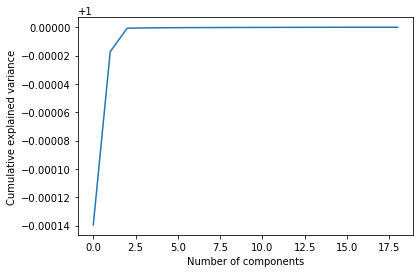

In [55]:
pca = PCA().fit(raw_feature_extraction_df)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

### Show Component in Table

In [56]:
pca = PCA()
X_pca = pca.fit_transform(raw_feature_extraction_df)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

PC1        PC2        PC3       PC4       PC5       PC6       PC7  \
0 -2250.140199  -8.870714 -16.873674  0.398696  1.031024 -0.540836 -0.556825   
1  -343.307907  -6.424486   2.048616 -1.349012  1.203366  0.236016  0.503332   
2 -2172.079597  11.914527  -6.314441 -0.804256  1.214820 -0.288141  0.418553   
3  -376.133033 -24.305489   5.890948  1.539120  1.351221  0.085610  0.523894   
4 -2138.236439  26.881339   0.755178 -0.046533 -0.292131  0.001525 -0.501533   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.361591  0.499836 -0.333618  0.673754 -0.117984  0.005124 -0.228150   
1  0.580748 -0.207129  0.170419 -0.351973  0.769424  0.465150 -0.230097   
2  0.119825  0.768101 -0.634729  0.033340  0.027221  0.462473 -0.394842   
3  0.514493 -0.306789  0.157325 -0.563112  0.595708 -0.262946  0.151970   
4 -0.097026  0.232916 -0.315146 -0.337689  0.105657 -0.056176 -0.012379   

       PC15      PC16          PC17          PC18          PC19  
0 -0.059638  0.116176  5.224359e-17  1.733754e-17 -5.757763e-17  
1  0.089535  0.351353 -4.714520e-17 -3.707104e-17  5.190491e-18  
2 -0.065470 -0.171078  1.884454e-14  1.397480e-15 -1.084379e-15  
3  0.054436 -0.220474 -1.114522e-14  2.567839e-15 -1.648951e-15  
4  0.010413  0.530527 -1.763429e-17 -2.840720e-17 -2.677523e-17

### Factor Loading

In [57]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=component_names,
    index=raw_feature_extraction_df.columns,
)

loadings

PC1           PC2           PC3           PC4  \
gender            -6.753380e-09 -3.575649e-04 -4.771003e-04 -1.242014e-02   
senior_citizen     1.680736e-05  2.865839e-03  2.241201e-03  6.208345e-04   
partner           -1.110223e-16 -1.859624e-15 -1.249001e-16  5.551115e-16   
dependents        -0.000000e+00  0.000000e+00 -1.110223e-16  2.498002e-16   
tenure             8.962857e-03 -4.420330e-01  8.963614e-01 -2.192646e-02   
phone_service     -0.000000e+00  0.000000e+00  4.336809e-19 -1.110223e-16   
multiple_lines     1.022193e-04  4.406872e-03  7.184977e-03 -5.157740e-03   
internet_service  -5.735370e-05 -8.101228e-03 -2.070712e-03 -7.893801e-02   
online_security    8.222837e-05  6.534197e-04  4.604598e-04  2.049947e-02   
online_backup      1.069896e-04  2.746727e-03  6.327436e-04  1.306986e-02   
device_protection  1.094327e-04  3.499547e-03  1.925023e-03  1.462976e-02   
tech_support       8.653820e-05  1.369278e-03  2.109282e-04  2.261321e-02   
streaming_tv       1.106778e-04  7.385120e-03  3.946981e-03 -5.468932e-03   
streaming_movies   1.118861e-04  7.266824e-03  3.861081e-03 -2.475321e-03   
contract           1.645316e-04 -1.748629e-02  1.762445e-02  7.619911e-03   
paperless_billing  3.447053e-05  6.327570e-03  3.181327e-03  1.288328e-02   
payment_method    -1.563066e-04  2.826383e-03 -2.313430e-02 -9.957208e-01   
monthly_charges    8.656787e-03  8.966693e-01  4.420898e-01 -8.388692e-03   
total_charges      9.999223e-01 -3.801034e-03 -1.187068e-02  1.020449e-04   

                            PC5           PC6           PC7           PC8  \
gender             2.615061e-03 -2.749140e-02  9.978987e-01 -4.006076e-03   
senior_citizen    -5.253148e-02 -1.385941e-01 -3.298293e-03 -7.071599e-02   
partner            2.215025e-16  1.988427e-15 -1.733202e-15  4.372764e-15   
dependents        -2.567391e-16 -1.942890e-16 -2.363561e-17  1.604619e-16   
tenure             3.354615e-03 -2.120339e-02 -4.270634e-04  3.035751e-03   
phone_service     -6.245005e-17 -1.665335e-16 -2.081668e-17 -4.510281e-17   
multiple_lines    -1.782278e-01 -4.109897e-02 -1.025944e-02  1.798391e-01   
internet_service  -8.732434e-01  1.816428e-01 -4.780655e-03  2.663315e-02   
online_security    2.660284e-01  1.005878e-01 -2.666614e-02  2.760003e-01   
online_backup      1.591950e-01 -3.444429e-02 -3.016674e-02  1.268868e-01   
device_protection  1.534838e-01  1.236547e-01  1.787032e-02 -1.263691e-01   
tech_support       2.628582e-01  2.002474e-01 -3.421721e-03  1.235726e-02   
streaming_tv       4.481027e-02  9.569538e-02  1.143083e-02 -3.437830e-01   
streaming_movies   5.128335e-02  9.446676e-02  8.768916e-03 -3.270750e-01   
contract           4.268406e-02  8.959697e-01  1.862372e-02 -1.560571e-01   
paperless_billing -1.741106e-02 -2.393410e-01 -3.711875e-02 -7.771042e-01   
payment_method     8.558997e-02 -2.554376e-03 -1.319661e-02 -5.954923e-03   
monthly_charges   -6.972464e-03  8.681874e-03  7.539876e-04  8.903585e-03   
total_charges     -8.288925e-05 -6.434311e-05 -4.195938e-06 -1.728786e-05   

                            PC9          PC10          PC11          PC12  \
gender             4.369730e-02 -2.411685e-02 -5.226831e-03 -3.468233e-03   
senior_citizen     2.172380e-02  9.446223e-02  2.052898e-01  1.187174e-01   
partner            4.439374e-15  4.549312e-15  9.683552e-16 -1.993956e-15   
dependents         6.661338e-16 -6.661338e-16 -3.053113e-16 -6.158268e-16   
tenure            -7.550913e-03 -3.709167e-03 -3.442298e-03  4.073108e-04   
phone_service      1.110223e-16 -1.665335e-16  3.191891e-16  1.110223e-16   
multiple_lines     4.652087e-01  7.089141e-01  2.723984e-01 -6.983234e-02   
internet_service  -6.388139e-02 -2.627005e-01 -1.222423e-01  1.060925e-01   
online_security    1.890452e-01 -1.072748e-01 -5.078228e-01  1.012535e-01   
online_backup      2.378661e-01 -5.792080e-01  6.727175e-01 -4.866978e-02   
device_protection -2.779373e-01  1.469711e-01  1.721977e-01  8.630147e-01   
tech_support       5.2

### Concate PCA Value with Churn Feature

In [58]:
raw_feature_extraction_df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [59]:
PCA_df = pd.concat([X_pca['PC1'], raw_feature_tranformation_df['churn']], axis=1)
PCA_df

PC1  churn
0    -2250.140199      0
1     -343.307907      0
2    -2172.079597      1
3     -376.133033      0
4    -2138.236439      1
...           ...    ...
7038  -244.263683      0
7039  5151.106784      0
7040 -1954.325741      0
7041 -1981.998658      1
7042  4693.610046      0

[7043 rows x 2 columns]

### Save PCA Value

In [60]:
# PCA_df.to_csv('../../datasets/apping/PCA_df.csv', index=False)

## Feature Selection

In [61]:
raw_feature_selection_df = raw_feature_tranformation_df

### Pearson Correlation

<AxesSubplot:>

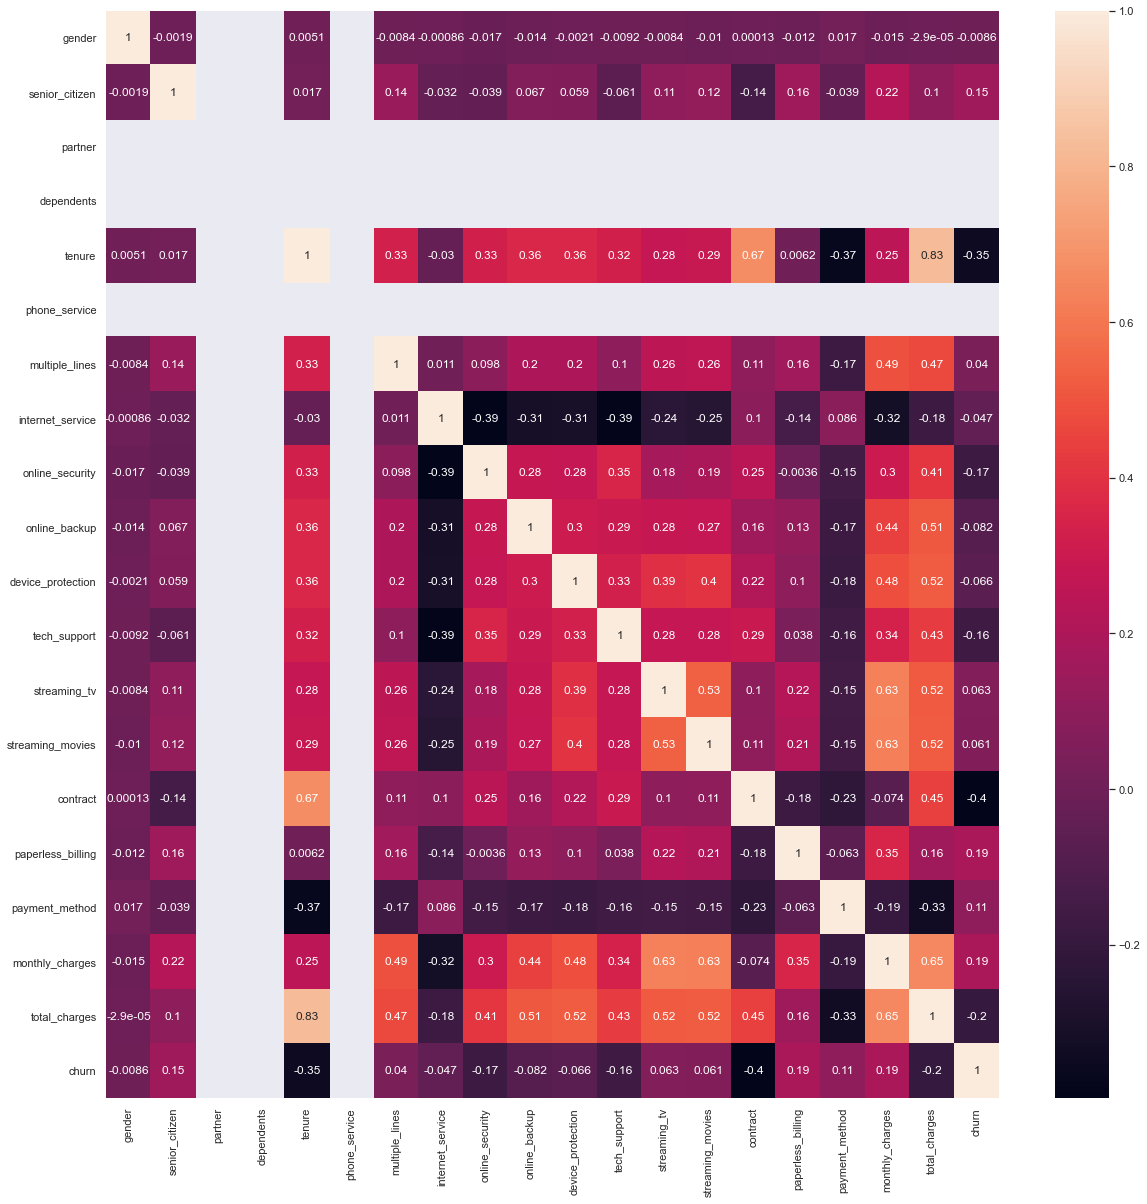

In [62]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(raw_feature_selection_df.corr(), annot=True)

### Spearman Correlation (Non-Linier)

<AxesSubplot:>

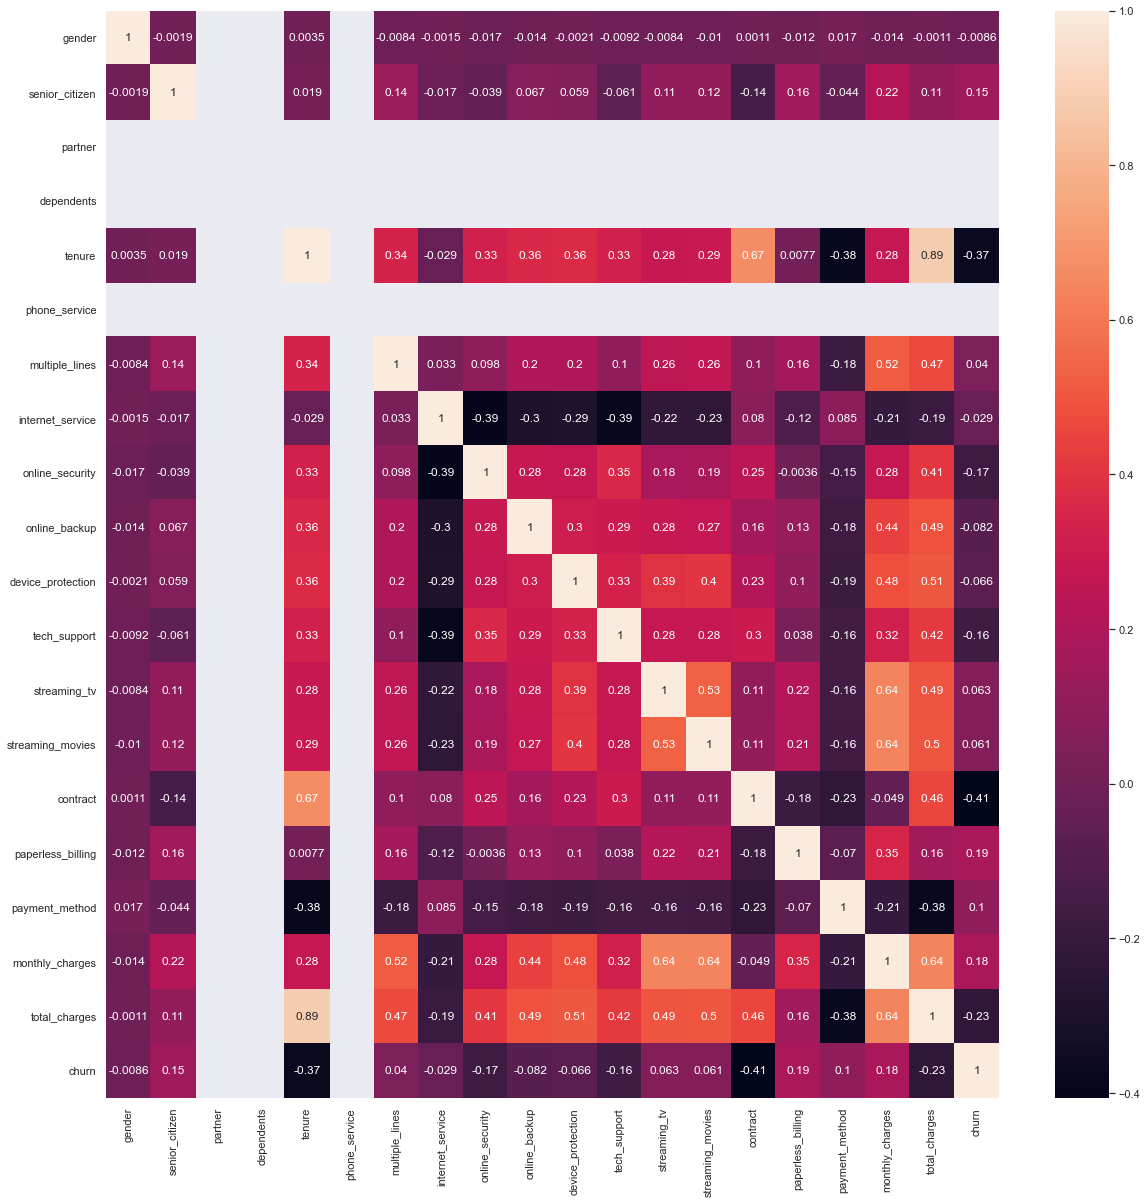

In [63]:
sns.heatmap(raw_feature_selection_df.corr('spearman'), annot=True)

In [64]:
# raw_feature_selection_df.to_csv('../../datasets/apping/EDA_df.csv', index=False)